
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "C:\\Users\\nlp\\Desktop\\통계학 수업\\HW7\\"
house = pd.read_csv(data_path + "houseprice.csv")

In [3]:
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


1\.	5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

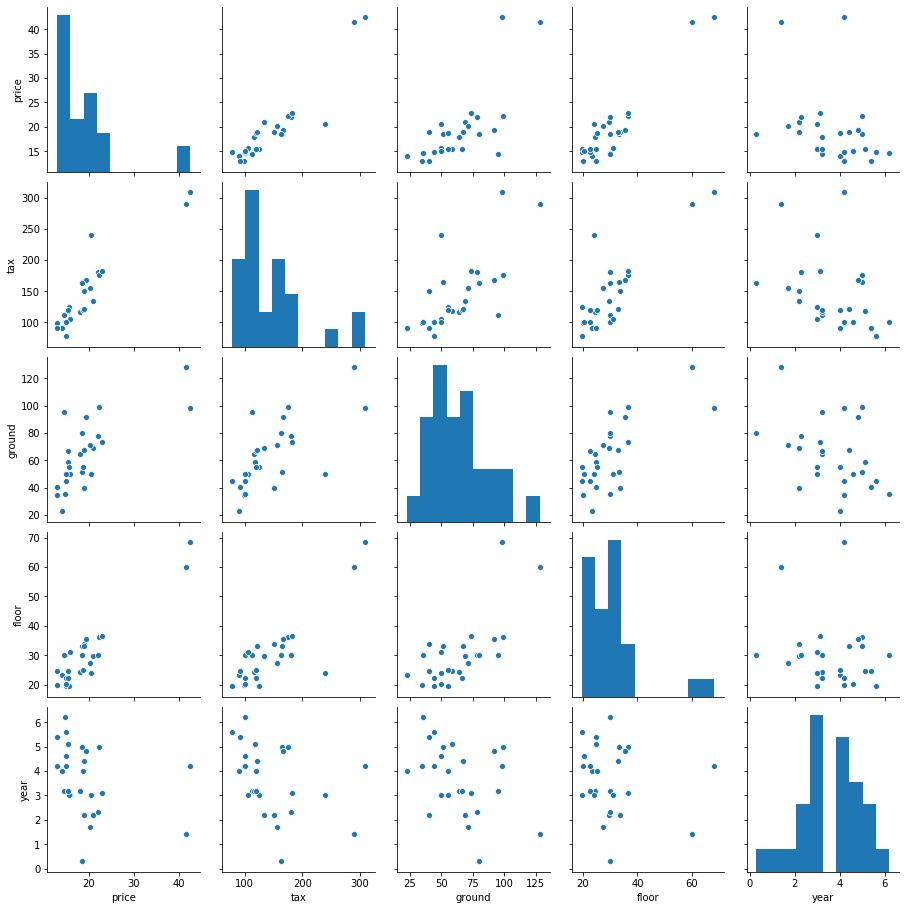

In [4]:
sns.pairplot(house)
plt.show()

2\. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [5]:
## R ^ 2 = (TSS-RSS) / TSS
## R ^ 2 = 회귀식이 설명해주는 Y의 변동량 / Y의 총 변동량

In [6]:
model= smf.ols("price ~ tax + ground + floor + year", data = house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.82e-12
Time:                        18:38:38   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# y_hat = 1.2187 + 0.0519*tax + 0.0116*ground + 0.3494*floor -0.2189*year

3\.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

In [11]:
# 결정계수 : 0.931

##"tax","ground","floor","year"가 모형에 포함에 되어있을때 

##유의한거 "tax", "floor"

4\. 회귀진단을 위한 그래프들을 그리고 모형이 적절한지 판단하여라. Influential point가 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가? 

In [12]:
# Scatter plot

Text(0, 0.5, 'residual')

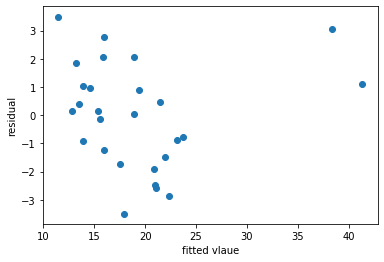

In [9]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("fitted vlaue")
plt.ylabel("residual")

In [15]:
inf = OLSInfluence(model)

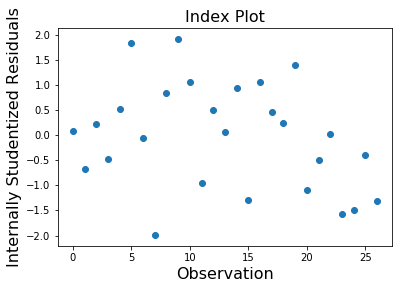

In [18]:
x=inf.plot_index('resid', threshold=3)

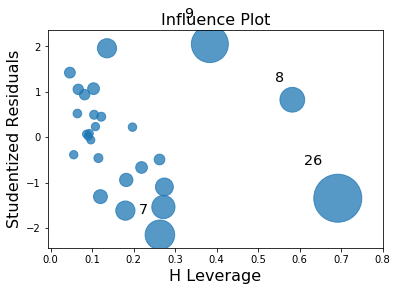

In [19]:
x = inf.plot_influence('resid')

In [22]:
idx = [7,8,9,26]
house.iloc[house.index.isin(idx),:]

,price,tax,ground,floor,year
7,14.45,112.186,95.2,30.02,3.2
8,42.45,308.404,98.0,68.40,4.2
9,41.45,289.196,128.0,60.00,1.4
26,20.50,240.000,50.0,24.00,3.0


In [23]:
house.describe()

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


In [28]:
house["mark"]=0
house.loc[house.index.isin(idx),'mark']=1

In [29]:
house.head()

,price,tax,ground,floor,year,mark
0,12.95,98.352,34.72,19.96,4.2,0
1,14.75,100.416,35.31,30.00,6.2,0
2,13.95,90.858,22.75,23.50,4.0,0
3,12.95,91.146,40.50,24.64,5.4,0
4,14.95,101.194,44.55,22.42,4.2,0


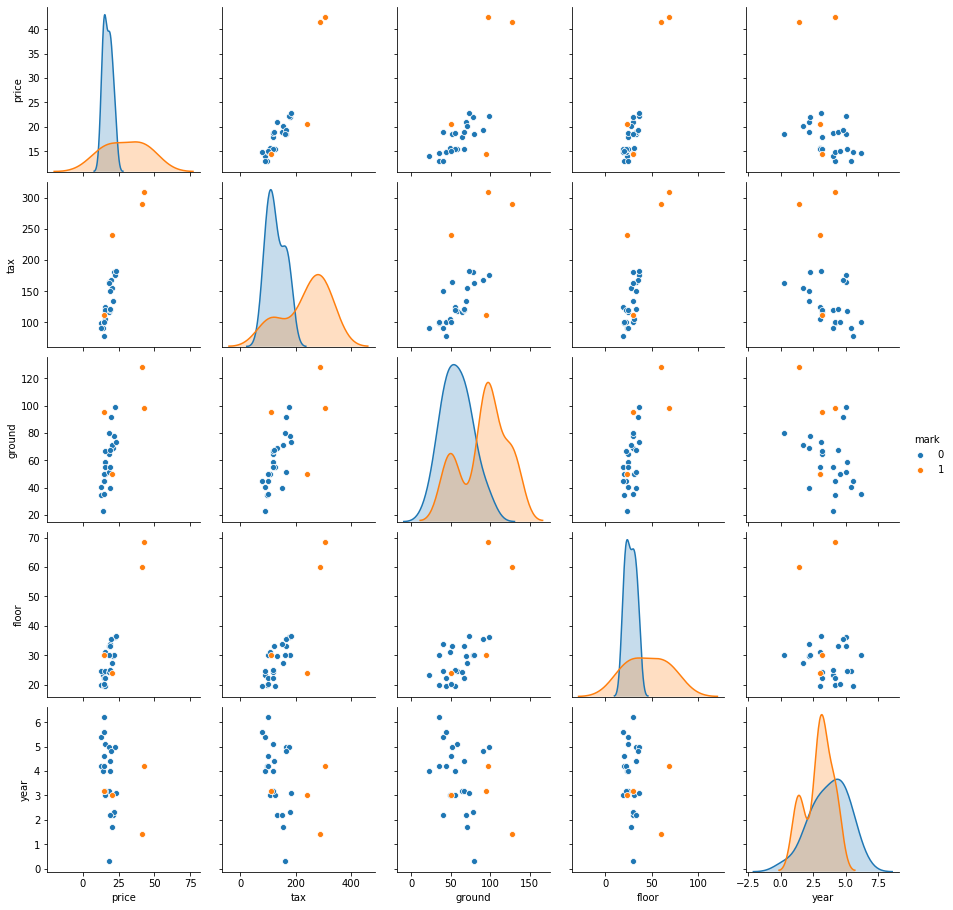

In [30]:
sns.pairplot(house, hue="mark")
plt.show()

In [31]:
house2 = house.iloc[~house.index.isin(idx),:]
models2 = smf.ols('price~tax+ground+floor+year', data=house2).fit()

In [33]:
models2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     21.49
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.18e-06
Time:                        19:00:00   Log-Likelihood:                -37.270
No. Observations:                  23   AIC:                             84.54
Df Residuals:                      18   BIC:                             90.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8682      1.936      3.547      0.002       2.800      10.937
tax            0.0379      0.021      1.850      0.081      -0.005       0.081
ground         0.0441      0.024      1.820      0.085      -0.007       0.095
floor          0.1467      0.085      1.723      0.102      -0.032       0.326
year          -0.2495      0.247     -1.010      0.326      -0.768       0.269
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.515
Skew:                           0.005   Prob(JB):                        0.773
Kurtosis:                       2.267   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
models2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.8682,1.936,3.547,0.002,2.800,10.937
tax,0.0379,0.021,1.850,0.081,-0.005,0.081
ground,0.0441,0.024,1.820,0.085,-0.007,0.095
floor,0.1467,0.085,1.723,0.102,-0.032,0.326
year,-0.2495,0.247,-1.010,0.326,-0.768,0.269


In [36]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.2187,2.047,0.595,0.558,-3.026,5.463
tax,0.0519,0.014,3.756,0.001,0.023,0.081
ground,0.0116,0.025,0.458,0.652,-0.041,0.064
floor,0.3494,0.073,4.807,0.000,0.199,0.500
year,-0.2189,0.331,-0.660,0.516,-0.906,0.469


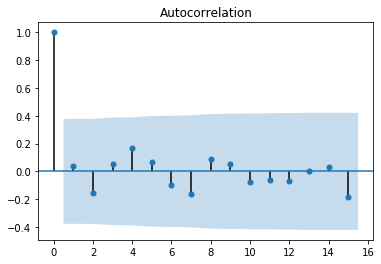

In [40]:
x = sm.graphics.tsa.plot_acf(model.resid) # acf : auto correlation function
# x - axis = lag
# y - axis = autocorrelation

5\.	세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

In [39]:
pred = model.get_prediction(exog=dict(tax=150, ground=50, floor=30, year=3))
pred.summary_frame(alpha=0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.392991,20.439589,15.768865,23.063714
